<a href="https://colab.research.google.com/github/ranadeepbhuyan/cancer-mri-analysis/blob/main/vopo/au_monash_cancer_lab_making_of_tumor_free_brain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nilearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 48.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re
import os
import cv2
import glob
import PIL
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import montage
import skimage.transform as skTrans
from skimage.transform import rotate
from skimage.transform import resize
from PIL import Image, ImageOps

# neural imaging
import nilearn as nl
import nibabel as nib


In [ ]:
path = '/content/drive/MyDrive/DOCUMENT_ANALYSIS_OF_method_of_functional_area_detection/UCSF-PDGM-v3_vol_of_brain_tumor_new (1).csv'

df = pd.read_csv(path)
df.head(30)


,Unnamed: 0,brain_volume_in_cm^3,brain_tumor_volume_in_cm^3,brain_tumor_%
0,0,1309.537,41.919,3.20
1,1,1219.829,28.419,2.33
2,2,1645.977,225.535,13.70
3,3,1335.437,168.611,12.63
4,4,1275.967,119.424,9.36
5,5,1402.643,117.717,8.39
6,6,1192.650,110.080,9.23
7,7,1051.763,181.143,17.22
8,8,1351.449,104.443,7.73
9,9,1330.459,190.594,14.33


In [ ]:
DATASET_PATH = r"/content/drive/MyDrive/PKG - UCSF-PDGM-v3/UCSF-PDGM-v3" +'/'

In [ ]:
def find_minimum_index(top_20_min):
  top_least_tumor_list = []
  for i in range(1,top_20_min+1):
    second_min = df['brain_tumor_volume_in_cm^3'].nsmallest(i).iloc[-1]
    index_of_second_min = df[df['brain_tumor_volume_in_cm^3'] == second_min].index[0]
    top_least_tumor_list.append(index_of_second_min)
  return top_least_tumor_list

In [ ]:
minimum_tumor_brains = find_minimum_index(top_20_min=40)

In [ ]:
minimum_tumor_brains

[450,
 459,
 219,
 435,
 402,
 55,
 436,
 240,
 296,
 204,
 332,
 233,
 342,
 107,
 224,
 203,
 261,
 260,
 263,
 275]

In [ ]:
#fatching ids form data path
def pathListIntoIds(dirList):
    x = []
    for i in range(0,len(dirList)):
        x.append(dirList[i][dirList[i].rfind('/')+1:])
    return x


train_data_ids = [f.path for f in os.scandir(DATASET_PATH)]

training_data_ids = pathListIntoIds(train_data_ids);

In [ ]:
training_data_ids.sort()

In [ ]:
minimum_tumor_brains[20]

211

In [ ]:
list_react = []

for i in range(20):
  list_react.append(minimum_tumor_brains[20+i])

In [ ]:
len(list_react)

20

In [ ]:
list_ids = []
for i in list_react:
  test = training_data_ids[i]
  list_ids.append(test)

In [ ]:
list_ids[:] = [i.split('_nifti')[0] for i in list_ids]

In [ ]:
list_ids

['UCSF-PDGM-0247',
 'UCSF-PDGM-0495',
 'UCSF-PDGM-0345',
 'UCSF-PDGM-0486',
 'UCSF-PDGM-0539',
 'UCSF-PDGM-0341',
 'UCSF-PDGM-0203',
 'UCSF-PDGM-0274',
 'UCSF-PDGM-0236',
 'UCSF-PDGM-0149',
 'UCSF-PDGM-0102',
 'UCSF-PDGM-0091',
 'UCSF-PDGM-0253',
 'UCSF-PDGM-0312',
 'UCSF-PDGM-0083',
 'UCSF-PDGM-0537',
 'UCSF-PDGM-0252',
 'UCSF-PDGM-0368',
 'UCSF-PDGM-0340',
 'UCSF-PDGM-0439']

In [ ]:
df = pd.DataFrame(data = list_ids)

In [ ]:
df.to_csv('list_of_small_tumor_ids.csv')

In [ ]:
output_path = '/content/drive/MyDrive/PKG - UCSF-PDGM-v3_3d_to_2d/new_create_brain_image/all files ' + '/'

In [ ]:
def creation(path,ids):
  for i in range(0,len(ids)):
    nifti_image = nib.load(path + f'{ids[i]}_nifti/{ids[i]}_FLAIR.nii')
    img_data = nifti_image.get_fdata()
    mirrored_img_vertical = cv2.flip(img_data, 0)
    tumor_data = nib.load(path + f'{ids[i]}_nifti/{ids[i]}_tumor_segmentation.nii').get_fdata()
    new_tumor_img = np.where(min_max_scaling(tumor_data) > 0.0, 1, 0)
    new_tumor_img2 = np.where(min_max_scaling(tumor_data) > 0.0, 0, 1)
    req_data3 = new_tumor_img2*min_max_scaling(img_data)
    req_data = new_tumor_img*min_max_scaling(mirrored_img_vertical)
    req_data[req_data == 0] = 1
    req_data3[req_data3 == 0] = 1
    req_data1 = req_data3*req_data
    req_data1[req_data1 == 1] = 0
    modified_img = nib.Nifti1Image(req_data1, nifti_image.affine)
    output = output_path + f'{ids[i]}_FLAIR_modified.nii'
    nib.save(modified_img, output)

In [ ]:
list_ids[0]

'UCSF-PDGM-0491'

In [ ]:
creation(DATASET_PATH,list_ids)

In [ ]:
/content/drive/MyDrive/PKG - UCSF-PDGM-v3_3d_to_2d/new_create_brain_image/all files /UCSF-PDGM-0255_FLAIR_modified.nii

In [ ]:
nifti_file_path = DATASET_PATH + 'UCSF-PDGM-0320_nifti/UCSF-PDGM-0320_FLAIR.nii'
nifti_image = nib.load(nifti_file_path)
img_data1 = nifti_image.get_fdata()

In [ ]:
mirrored_img_horizontal = cv2.flip(img_data1, 0)

In [ ]:
tumor_img_path = DATASET_PATH + 'UCSF-PDGM-0320_nifti/UCSF-PDGM-0320_tumor_segmentation.nii'
tumor_img = nib.load(tumor_img_path)
tumor_data = tumor_img.get_fdata()

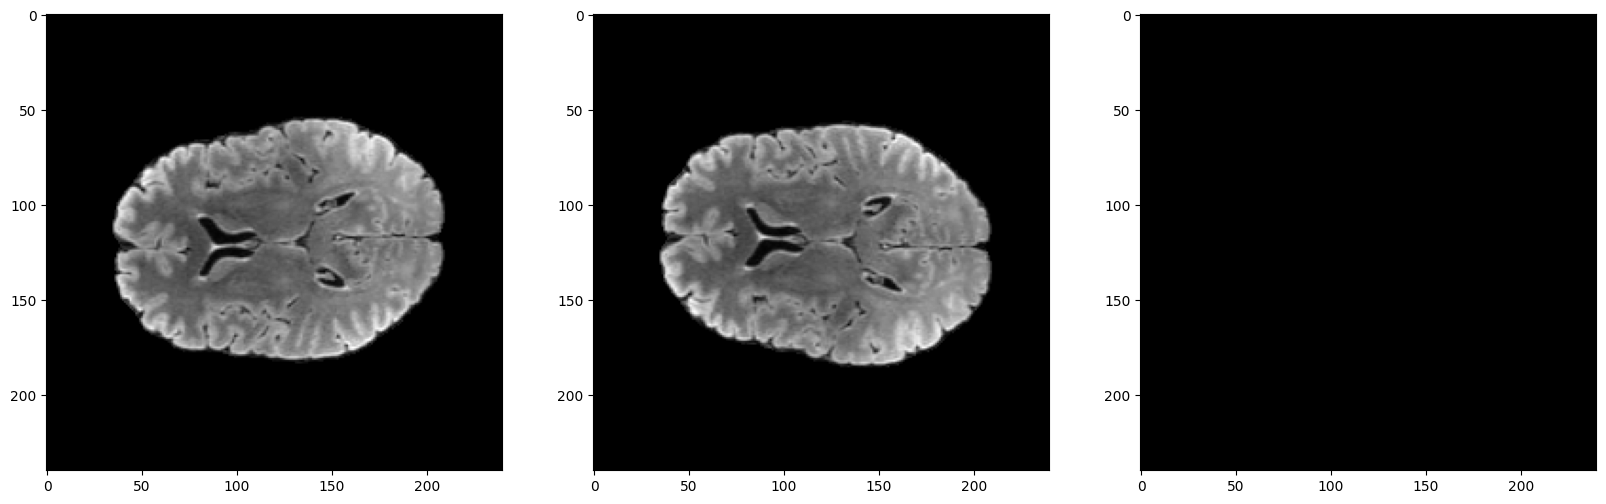

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (20, 10))
no = 90
ax1.imshow(mirrored_img_horizontal[:,:,no], cmap = 'gray')
ax2.imshow(img_data1[:,:,no], cmap = 'gray')
ax3.imshow(tumor_data[:,:,no], cmap = 'gray')


In [ ]:
UCSF-PDGM-0500
UCSF-PDGM-0491
UCSF-PDGM-0255

In [ ]:
def min_max_scaling(image):
    min_val = np.min(image)
    max_val = np.max(image)
    normalized_image = (image - min_val) / (max_val - min_val)
    return normalized_image

In [ ]:
normal_img1 = min_max_scaling(mirrored_img_horizontal)
normal_img2 = min_max_scaling(img_data1)
normal_img3 = min_max_scaling(tumor_data)

In [ ]:
threshold = 0.0
new_tumor_img = np.where(normal_img3 > threshold, 1, 0)

In [ ]:
threshold = 0.0
new_tumor_img2 = np.where(normal_img3 > threshold, 0, 1)

In [ ]:
req_data3 = new_tumor_img2*normal_img2

In [ ]:
req_data = new_tumor_img*normal_img1

In [ ]:
req_data[req_data == 0] = 1
req_data3[req_data3 == 0] = 1

In [ ]:
req_data1 = req_data3*req_data

In [ ]:
req_data1[req_data1 == 1] = 0

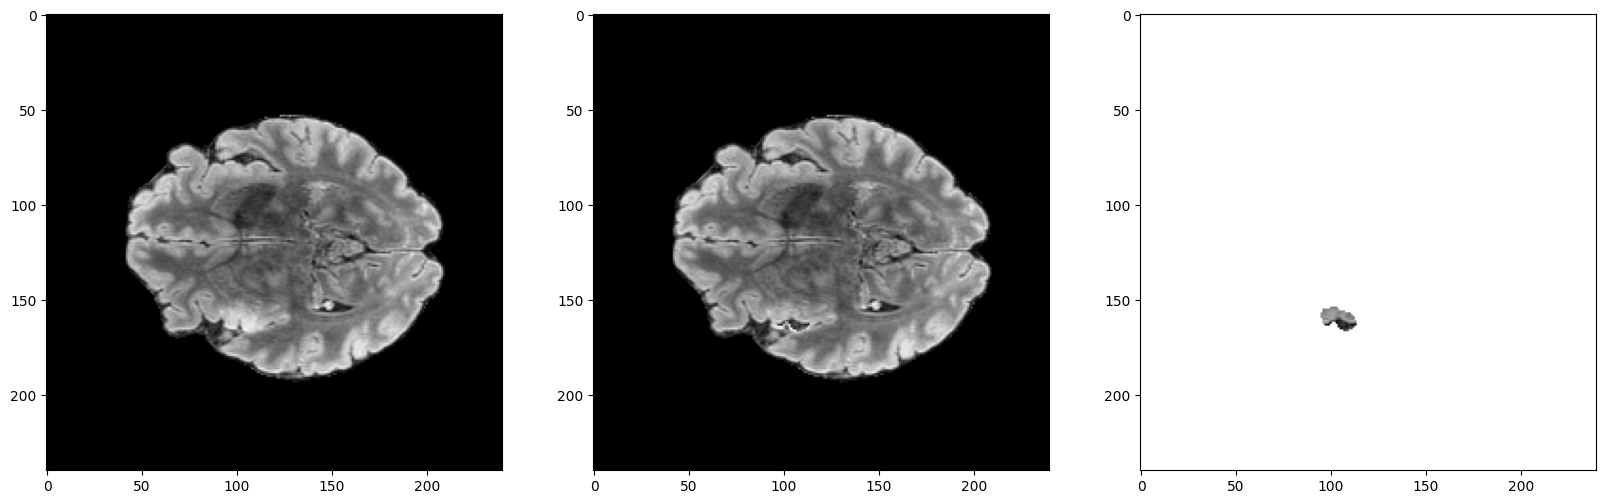

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (20, 10))
no = 80
ax1.imshow(img_data1[:,:,no], cmap = 'gray')
ax2.imshow(req_data1[:,:,no], cmap = 'gray')
ax3.imshow(req_data[:,:,no], cmap = 'gray')

In [ ]:
modified_img = nib.Nifti1Image(req_data1, nifti_image.affine)

# Save the modified image
output_path = '/content/drive/MyDrive/PKG - UCSF-PDGM-v3_3d_to_2d/UCSF-PDGM-0433_FLAIR_modified.nii'
nib.save(modified_img, output_path)